In [1]:
import pandas as pd
from spatialsurf.utils.data_pp import spatial_pp
import numpy as np
from spatialsurf.utils.deconvolution import deconvolution
from spatialsurf.utils.calculate_cell_type_expression import calc_cell_type_expr
from spatialsurf.utils.cell_type_matching import cell_type_matching
import seaborn as sns
import matplotlib.pyplot as plt
from spatialsurf.utils.cell_type_visualization import celltype_visualization_ST

In [2]:
data_dir = 'example_data/simulated_data/raw_data/'
save_dir = 'example_data/simulated_data/pp_data/'
expr_path = data_dir + '/count.csv'
pos_path = data_dir + '/pos.csv'
device_id = 2

# read data

In [3]:
df_expr = pd.read_csv(expr_path)
df_pos = pd.read_csv(pos_path)
df_pos['x'] = df_pos['x'] - df_pos['x'].min()
df_pos['y'] = df_pos['y'] - df_pos['y'].min()
barcodes = np.array(range(len(df_expr)))

# data preprocessing

## Data input
df_expr: (n_spots * n_genes), dataframe, with column names (gene names)  
df_pos: (n_spots * 2), dataframe, with column names (‘x’, ‘y’)  
barcodes: (n_spots,), numpy array  

In [4]:
df_pp_data = spatial_pp(df_expr, df_pos, barcodes, save_dir)

/opt/conda/envs/SURF/lib/python3.9/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Data preprocessing begin...
Spots with no more than 100 gene counts are filtered out.
Genes present in all the spots are filtered out.
Genes detected in fewer than 5% of spots are filtered out.
Gene filtering begin...
2366 overdispersed genes remaining.
select the top 1000  most overdispersed genes by default.


# deconvolution 
 (To save time, here we just set epoch=5 to show the deconvolution process. To get better deconvolution results, it is recommended to set epoch=500.)  
 cell_type_num: int, the cell type number.  
 save_dir_name: str, the name of the folders where to save the deconvolution results.  
 device_id: int, the id of the gpu you want to use.  
 num_epoch: int, default=500. The number of epochs to train the model.  

In [5]:
df_deconvolution_results, df_beta = deconvolution(df_pp_data, cell_type_num=4, spatial_mode='square', save_dir_name='simulated_data', device_id=device_id, num_epoch=5)


Data organization...
Total_spot_num:800
Data organization completed.
begin time:2024-11-21_01-33-43

Deconvolution begin...
Epoch 1/5 completed
Epoch 2/5 completed
Epoch 3/5 completed
Epoch 4/5 completed
Epoch 5/5 completed
Deconvolution completed


## Results saved
‘pred.csv’: The predicted cell types proportions in each spot.  
‘beta.csv’: The deconvolved gene expressions of each cell type.  
‘last.pkl’: The saved trained model.  

In [6]:
# Here we use the deconvolution results of epoch=500 for further exploration.
results_dir = 'results_save/simulated_data_example1'
df_deconvolution_results = pd.read_csv(results_dir + '/prediction_save/pred.csv')
df_beta = pd.read_csv(results_dir + '/prediction_save/beta.csv')

# visualization

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


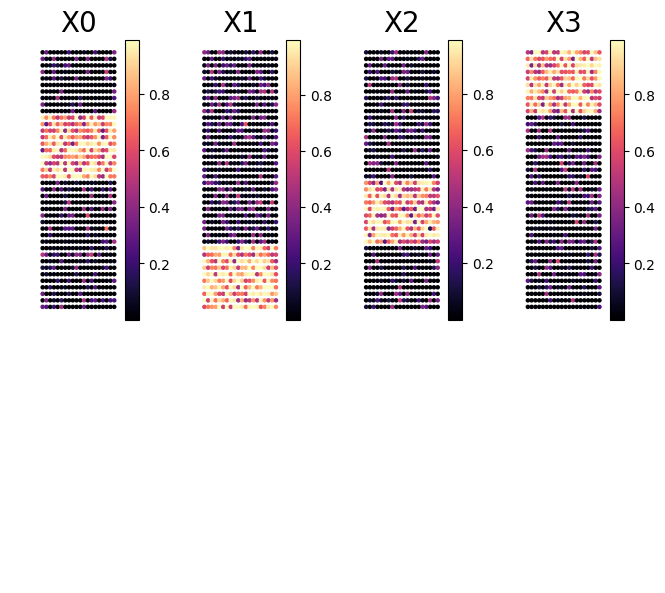

In [7]:
celltype_visualization_ST(df_deconvolution_results.iloc[:, 3:], df_deconvolution_results.iloc[:, 1:3], col_num=4)

# cell type matching

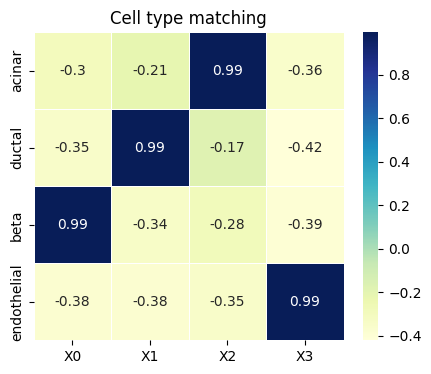

In [8]:
sc_data_path = data_dir + 'sc_data.h5'
df_sc = pd.read_hdf(sc_data_path, key='df')
df_gt_expr = calc_cell_type_expr(df_sc, save_dir)
df_matching_results, df_corr = cell_type_matching(df_gt_expr, df_beta)

plt.figure(figsize=(5, 4))
sns.heatmap(df_corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Cell type matching')
plt.show()